In [1]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from models.ddm import DDM, CP
from plots import redm
from metrics import inversion_number, wilcoxon_test, effect_size, friedman_test_for_4_samples
from metrics import friedman_test_for_8_samples
from plots import heatmap, training_loss
from torchmetrics.classification import BinaryCalibrationError
import torch

In [2]:
training_loss_0 = np.loadtxt("outputs/_training_loss_ae_model_ids_0.csv", delimiter=",")
training_loss_1 = np.loadtxt("outputs/_training_loss_ae_model_ids_1.csv", delimiter=",")
training_loss_2 = np.loadtxt("outputs/_training_loss_ae_model_ids_2.csv", delimiter=",")
training_loss_3 = np.loadtxt("outputs/_training_loss_ae_model_ids_3.csv", delimiter=",")
training_loss_4 = np.loadtxt("outputs/_training_loss_ae_model_ids_4.csv", delimiter=",")
training_loss_mcd = np.loadtxt("outputs/_training_loss_ae_dropout_model_ids.csv", delimiter=",")
training_loss_vae = np.loadtxt("outputs/_training_loss_vae_model_ids.csv", delimiter=",")

In [3]:
training_loss_edl = (training_loss_0 + training_loss_1 + training_loss_2 + training_loss_3 + training_loss_4)/5

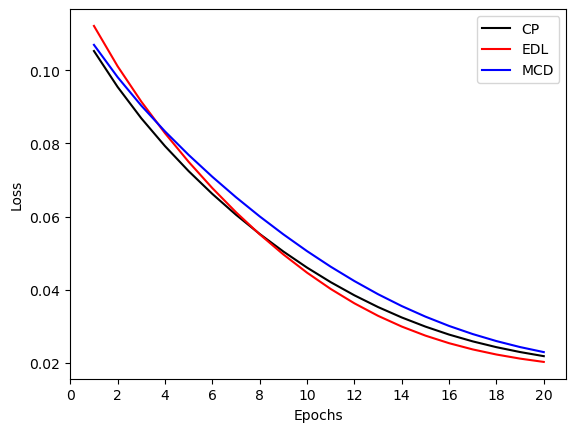

In [4]:
training_loss(training_loss_0, training_loss_edl, training_loss_mcd, training_loss_vae, dbname="ids")

In [5]:
# edl
edl_score_0 = np.loadtxt("outputs/ids_scores_test_ae_model_ids_0.csv", delimiter=",")
edl_score_1 = np.loadtxt("outputs/ids_scores_test_ae_model_ids_1.csv", delimiter=",")
edl_score_2 = np.loadtxt("outputs/ids_scores_test_ae_model_ids_2.csv", delimiter=",")
edl_score_3 = np.loadtxt("outputs/ids_scores_test_ae_model_ids_3.csv", delimiter=",")
edl_score_4 = np.loadtxt("outputs/ids_scores_test_ae_model_ids_4.csv", delimiter=",")

In [6]:
# mcd
mcd_score_0 = np.loadtxt("outputs/ids_scores_test_ae_dropout_model_ids0.csv", delimiter=",")
mcd_score_1 = np.loadtxt("outputs/ids_scores_test_ae_dropout_model_ids1.csv", delimiter=",")
mcd_score_2 = np.loadtxt("outputs/ids_scores_test_ae_dropout_model_ids2.csv", delimiter=",")
mcd_score_3 = np.loadtxt("outputs/ids_scores_test_ae_dropout_model_ids3.csv", delimiter=",")
mcd_score_4 = np.loadtxt("outputs/ids_scores_test_ae_dropout_model_ids4.csv", delimiter=",")

In [7]:
# mcd
vae_score_0 = np.loadtxt("outputs/ids_scores_test_vae_model_ids0.csv", delimiter=",")
vae_score_1 = np.loadtxt("outputs/ids_scores_test_vae_model_ids1.csv", delimiter=",")
vae_score_2 = np.loadtxt("outputs/ids_scores_test_vae_model_ids2.csv", delimiter=",")
vae_score_3 = np.loadtxt("outputs/ids_scores_test_vae_model_ids3.csv", delimiter=",")
vae_score_4 = np.loadtxt("outputs/ids_scores_test_vae_model_ids4.csv", delimiter=",")

In [8]:
edl_scores = np.concatenate((edl_score_0.reshape(-1, 1), edl_score_1.reshape(-1, 1), edl_score_2.reshape(-1, 1),
                            edl_score_3.reshape(-1, 1), edl_score_4.reshape(-1, 1)), axis=1)
mcd_scores = np.concatenate((mcd_score_0.reshape(-1, 1), mcd_score_1.reshape(-1, 1), mcd_score_2.reshape(-1, 1),
                            mcd_score_3.reshape(-1, 1), mcd_score_4.reshape(-1, 1)), axis=1)
vae_scores = np.concatenate((vae_score_0.reshape(-1, 1), vae_score_1.reshape(-1, 1), vae_score_2.reshape(-1, 1),
                            vae_score_3.reshape(-1, 1), vae_score_4.reshape(-1, 1)), axis=1)

In [9]:
edl_eta_0 = np.loadtxt("outputs/ids_threshold_ae_model_ids_0.csv")
edl_eta_1 = np.loadtxt("outputs/ids_threshold_ae_model_ids_1.csv")
edl_eta_2 = np.loadtxt("outputs/ids_threshold_ae_model_ids_2.csv")
edl_eta_3 = np.loadtxt("outputs/ids_threshold_ae_model_ids_3.csv")
edl_eta_4 = np.loadtxt("outputs/ids_threshold_ae_model_ids_4.csv")

In [10]:
vae_eta = np.loadtxt("outputs/ids_threshold_vae_model_ids.csv")

In [11]:
mcd_eta = np.loadtxt("outputs/ids_threshold_ae_dropout_model_ids.csv")

In [12]:
selection = np.loadtxt("outputs/_selection_ids.csv")

In [13]:
XY_test = np.loadtxt("data/ids_test.csv", delimiter=',')[selection.astype(int)]

In [14]:
y_test = XY_test[:, -1]

In [15]:
y_edl_pred_0 = (edl_score_0 > edl_eta_0).astype(int)
y_edl_pred_1 = (edl_score_1 > edl_eta_1).astype(int)
y_edl_pred_2 = (edl_score_2 > edl_eta_2).astype(int)
y_edl_pred_3 = (edl_score_3 > edl_eta_3).astype(int)
y_edl_pred_4 = (edl_score_4 > edl_eta_4).astype(int)

In [16]:
y_mcd_pred_0 = (mcd_score_0 > mcd_eta).astype(int)
y_mcd_pred_1 = (mcd_score_1 > mcd_eta).astype(int)
y_mcd_pred_2 = (mcd_score_2 > mcd_eta).astype(int)
y_mcd_pred_3 = (mcd_score_3 > mcd_eta).astype(int)
y_mcd_pred_4 = (mcd_score_4 > mcd_eta).astype(int)

In [17]:
y_vae_pred_0 = (vae_score_0 > vae_eta).astype(int)
y_vae_pred_1 = (vae_score_1 > vae_eta).astype(int)
y_vae_pred_2 = (vae_score_2 > vae_eta).astype(int)
y_vae_pred_3 = (vae_score_3 > vae_eta).astype(int)
y_vae_pred_4 = (vae_score_4 > vae_eta).astype(int)

In [18]:
print(classification_report(y_test, y_edl_pred_0))
print(classification_report(y_test, y_edl_pred_1))
print(classification_report(y_test, y_edl_pred_2))
print(classification_report(y_test, y_edl_pred_3))
print(classification_report(y_test, y_edl_pred_4))
print(accuracy_score(y_test, y_edl_pred_0))
print(accuracy_score(y_test, y_edl_pred_1))
print(accuracy_score(y_test, y_edl_pred_2))
print(accuracy_score(y_test, y_edl_pred_3))
print(accuracy_score(y_test, y_edl_pred_4))

              precision    recall  f1-score   support

         0.0       0.65      0.60      0.62     42672
         1.0       0.44      0.49      0.46     27328

    accuracy                           0.56     70000
   macro avg       0.54      0.54      0.54     70000
weighted avg       0.57      0.56      0.56     70000

              precision    recall  f1-score   support

         0.0       0.67      0.62      0.65     42672
         1.0       0.47      0.53      0.50     27328

    accuracy                           0.59     70000
   macro avg       0.57      0.58      0.57     70000
weighted avg       0.60      0.59      0.59     70000

              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65     42672
         1.0       0.48      0.54      0.51     27328

    accuracy                           0.60     70000
   macro avg       0.58      0.59      0.58     70000
weighted avg       0.61      0.60      0.60     70000

              preci

In [19]:
print(classification_report(y_test, y_mcd_pred_0))
print(classification_report(y_test, y_mcd_pred_1))
print(classification_report(y_test, y_mcd_pred_2))
print(classification_report(y_test, y_mcd_pred_3))
print(classification_report(y_test, y_mcd_pred_4))
print(accuracy_score(y_test, y_mcd_pred_0))
print(accuracy_score(y_test, y_mcd_pred_1))
print(accuracy_score(y_test, y_mcd_pred_2))
print(accuracy_score(y_test, y_mcd_pred_3))
print(accuracy_score(y_test, y_mcd_pred_4))

              precision    recall  f1-score   support

         0.0       0.81      0.45      0.58     42672
         1.0       0.49      0.83      0.62     27328

    accuracy                           0.60     70000
   macro avg       0.65      0.64      0.60     70000
weighted avg       0.69      0.60      0.60     70000

              precision    recall  f1-score   support

         0.0       0.81      0.46      0.58     42672
         1.0       0.49      0.83      0.62     27328

    accuracy                           0.60     70000
   macro avg       0.65      0.64      0.60     70000
weighted avg       0.69      0.60      0.60     70000

              precision    recall  f1-score   support

         0.0       0.81      0.46      0.58     42672
         1.0       0.50      0.83      0.62     27328

    accuracy                           0.60     70000
   macro avg       0.65      0.64      0.60     70000
weighted avg       0.69      0.60      0.60     70000

              preci

In [20]:
print(classification_report(y_test, y_vae_pred_0))
print(classification_report(y_test, y_vae_pred_1))
print(classification_report(y_test, y_vae_pred_2))
print(classification_report(y_test, y_vae_pred_3))
print(classification_report(y_test, y_vae_pred_4))
print(accuracy_score(y_test, y_vae_pred_0))
print(accuracy_score(y_test, y_vae_pred_1))
print(accuracy_score(y_test, y_vae_pred_2))
print(accuracy_score(y_test, y_vae_pred_3))
print(accuracy_score(y_test, y_vae_pred_4))

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67     42672
         1.0       0.51      0.57      0.54     27328

    accuracy                           0.62     70000
   macro avg       0.61      0.61      0.61     70000
weighted avg       0.63      0.62      0.62     70000

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67     42672
         1.0       0.51      0.57      0.54     27328

    accuracy                           0.62     70000
   macro avg       0.61      0.61      0.61     70000
weighted avg       0.63      0.62      0.62     70000

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67     42672
         1.0       0.51      0.57      0.54     27328

    accuracy                           0.62     70000
   macro avg       0.61      0.61      0.61     70000
weighted avg       0.63      0.62      0.62     70000

              preci

In [21]:
edl_eta = (edl_eta_0 + edl_eta_1 + edl_eta_2 + edl_eta_3 + edl_eta_4)/5

In [22]:
edl_mean_scores = np.mean(edl_scores, axis=1)
edl_std_scores = np.std(edl_scores, axis=1)

In [23]:
index_n = edl_mean_scores < edl_eta
index_a = edl_mean_scores >= edl_eta
edl_normal_scores = edl_mean_scores[index_n]

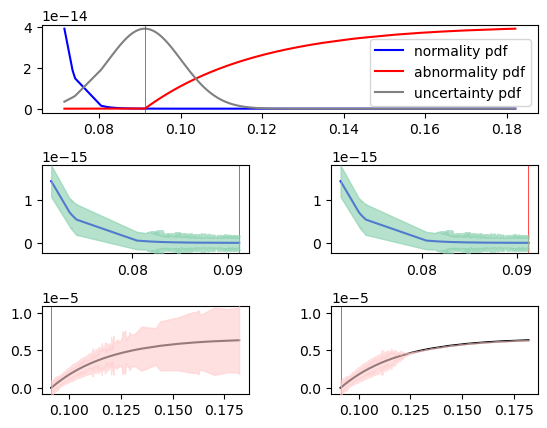

In [24]:
ddm_edl = DDM(edl_scores, y_test, edl_eta, d=0.8, phi=0.4)
normal_edl, abnormal_edl = ddm_edl.distribution_segments()
redm(ddm_edl.params, "edl_distribution_ids", scale_n =0.0000000000001, scale_a = 0.0005)

In [25]:
metric = BinaryCalibrationError(n_bins=2, norm='l2')
edl_confidence = torch.tensor(np.concatenate((normal_edl[1], abnormal_edl[1])))
edl_target = torch.tensor(np.concatenate((normal_edl[-1], abnormal_edl[-1])))
edl_confidence_p = torch.tensor(np.concatenate((normal_edl[2], abnormal_edl[2])))
print("edl = ", metric(edl_confidence, edl_target))
print("edl+ = ", metric(edl_confidence_p, edl_target))

edl =  tensor(0.3887, dtype=torch.float64)
edl+ =  tensor(0.3887, dtype=torch.float64)


In [26]:
wilcoxon_test(edl_confidence, edl_confidence_p)

0.0

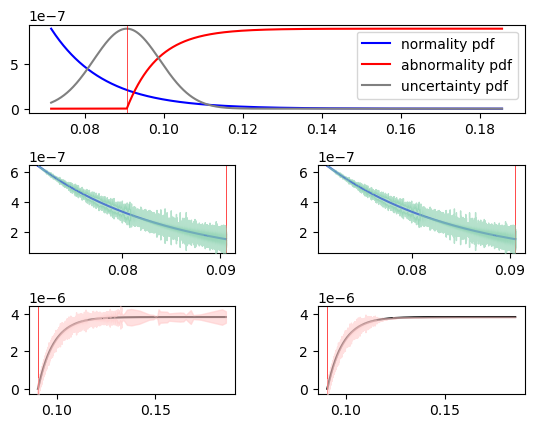

In [27]:
ddm_mcd = DDM(mcd_scores, y_test, mcd_eta, d=0.3, phi=0.4)
normal_mcd, abnormal_mcd = ddm_mcd.distribution_segments()
redm(ddm_mcd.params, "mcd_distribution_ids", scale_n =0.000005, scale_a = 0.00002)

In [28]:
mcd_confidence = torch.tensor(np.concatenate((normal_mcd[1], abnormal_mcd[1])))
mcd_target = torch.tensor(np.concatenate((normal_mcd[-1], abnormal_mcd[-1])))
mcd_confidence_p = torch.tensor(np.concatenate((normal_mcd[2], abnormal_mcd[2])))
print("mcd = ", metric(mcd_confidence, mcd_target))
print("mcd+ = ", metric(mcd_confidence_p, mcd_target))

mcd =  tensor(0.3854, dtype=torch.float64)
mcd+ =  tensor(0.3857, dtype=torch.float64)


In [29]:
wilcoxon_test(mcd_confidence, mcd_confidence_p)

0.0

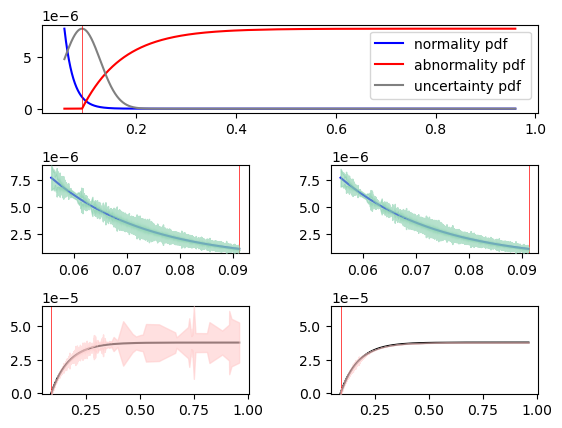

In [30]:
ddm_vae = DDM(vae_scores, y_test, edl_eta, d=0.3, phi=0.4)
normal_vae, abnormal_vae = ddm_vae.distribution_segments()
redm(ddm_vae.params, "vae_distribution_ids", scale_n =0.0005, scale_a = 0.001)

In [31]:
vae_confidence = torch.tensor(np.concatenate((normal_vae[1], abnormal_vae[1])))
vae_target = torch.tensor(np.concatenate((normal_vae[-1], abnormal_vae[-1])))
vae_confidence_p = torch.tensor(np.concatenate((normal_vae[2], abnormal_vae[2])))
print("vae = ", metric(vae_confidence, vae_target))
print("vae+ = ", metric(vae_confidence_p, vae_target))

vae =  tensor(0.3898, dtype=torch.float64)
vae+ =  tensor(0.3900, dtype=torch.float64)


In [32]:
wilcoxon_test(vae_confidence, vae_confidence_p)

0.0

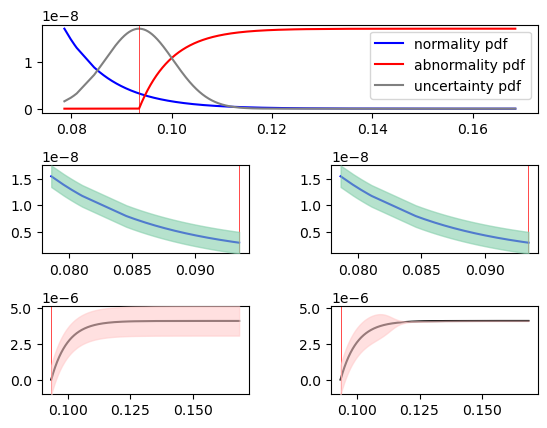

In [33]:
ddm_cp = DDM(edl_score_0, y_test, edl_eta_0, d=0.3, phi=0.4)
normal_cp, abnormal_cp = ddm_cp.distribution_segments(True)
redm(ddm_cp.params, "cp_distribution_ids", scale_n =0.00000002, scale_a = 0.00001)

In [34]:
cp_confidence = torch.tensor(np.concatenate((normal_cp[1], abnormal_cp[1])))
cp_target = torch.tensor(np.concatenate((normal_cp[-1], abnormal_cp[-1])))
cp_confidence_p = torch.tensor(np.concatenate((normal_cp[2], abnormal_cp[2])))
print("cp = ", metric(cp_confidence, cp_target))
print("cp+ = ", metric(cp_confidence_p, cp_target))

cp =  tensor(0.2884, dtype=torch.float64)
cp+ =  tensor(0.2927, dtype=torch.float64)


In [ ]:
wilcoxon_test(cp_confidence, cp_confidence_p)

In [ ]:

conf = np.concatenate((edl_confidence.detach().cpu().numpy().reshape(-1, 1),
                              mcd_confidence.detach().cpu().numpy().reshape(-1, 1),
                              vae_confidence.detach().cpu().numpy().reshape(-1, 1),
                              cp_confidence.detach().cpu().numpy().reshape(-1, 1),
                              edl_confidence_p.detach().cpu().numpy().reshape(-1, 1),
                              mcd_confidence_p.detach().cpu().numpy().reshape(-1, 1),
                              vae_confidence_p.detach().cpu().numpy().reshape(-1, 1),
                              cp_confidence_p.detach().cpu().numpy().reshape(-1, 1)), axis=1)

In [ ]:
friedman_test_for_4_samples(conf[:, 0], conf[:, 1], conf[:, 2], conf[:, 3])

In [ ]:
friedman_test_for_4_samples(conf[:, 4], conf[:, 5], conf[:, 6], conf[:, 7])

In [ ]:
friedman_test_for_8_samples(conf[:, 0], conf[:, 1], conf[:, 3], conf[:, 4],
                           conf[:, 4], conf[:, 5], conf[:, 6], conf[:, 7])

In [ ]:
effect_sizes = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        if i!=j:
            s = np.concatenate((conf[:, i].reshape(-1, 1), conf[:, j].reshape(-1, 1)), axis=1)
            effect_sizes[i, j] = effect_size(s)

In [ ]:
heatmap(effect_sizes, "ids_heatmap")

In [ ]:
in_edl = inversion_number(normal_edl[0], normal_edl[1], abnormal_edl[0], abnormal_edl[1], edl_eta)
in_edl_plus = inversion_number(normal_edl[0], normal_edl[2], abnormal_edl[0], abnormal_edl[2], edl_eta)
in_edl, in_edl_plus

In [ ]:
in_mcd = inversion_number(normal_mcd[0], normal_mcd[1], abnormal_mcd[0], abnormal_mcd[1], mcd_eta)
in_mcd_plus = inversion_number(normal_mcd[0], normal_mcd[2], abnormal_mcd[0], abnormal_mcd[2], mcd_eta)
in_mcd, in_mcd_plus

In [ ]:
in_vae = inversion_number(normal_vae[0], normal_vae[1], abnormal_vae[0], abnormal_vae[1], vae_eta)
in_vae_plus = inversion_number(normal_vae[0], normal_vae[2], abnormal_vae[0], abnormal_vae[2], vae_eta)
in_vae, in_vae_plus

In [ ]:
in_cp = inversion_number(normal_cp[0], normal_cp[1], abnormal_cp[0], abnormal_cp[1], edl_eta_0)
in_cp_plus = inversion_number(normal_cp[0], normal_cp[2], abnormal_cp[0], abnormal_cp[2], edl_eta_0)
in_cp, in_cp_plus